In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from numpy import dstack
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#x_train  y_train to train
#x_test   y_test to test
#video
import joblib
x_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/x_test')
x_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/x_train')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/labels_train')

#audio

x_audio_test = joblib.load('/content/drive/My Drive/fusion/audio/data_set_fusion/expert2/x_test')
x_audio_train = joblib.load('/content/drive/My Drive/fusion/audio/data_set_fusion/expert2/x_train')

In [3]:
len(x_test),len(x_train),len(x_audio_test),len(x_audio_train)

(207, 1860, 207, 1860)

In [4]:
import pandas as pd

x_train = pd.concat([x_train, x_audio_train], axis=1,join='inner')
x_test =  pd.concat([x_test, x_audio_test], axis=1,join='inner')

In [5]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,9.883354e-01,0.007682,0.000010,0.003067,0.000143,0.000763,9.921690e-01,9.054077e-07,1.169417e-09,2.063540e-03,3.847837e-08,5.766492e-03
1,1.501772e-03,0.012143,0.000139,0.685228,0.002173,0.298815,3.425908e-11,1.176235e-10,1.732216e-11,9.995568e-01,3.482720e-11,4.431483e-04
2,9.311091e-07,0.000201,0.999669,0.000046,0.000003,0.000080,2.478469e-07,1.266780e-05,9.027049e-01,2.737287e-03,1.558928e-06,9.454336e-02
3,1.096132e-04,0.000158,0.000176,0.951691,0.001256,0.046609,4.237416e-03,2.058971e-03,2.958562e-03,8.718588e-02,2.920613e-02,8.743531e-01
4,2.936176e-05,0.000147,0.000104,0.001115,0.000087,0.998517,2.794041e-07,1.254081e-01,3.048589e-05,8.244790e-01,2.722030e-06,5.007934e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
202,6.101698e-06,0.000008,0.000025,0.000990,0.001861,0.997110,1.556996e-08,6.225067e-09,1.334327e-04,7.507196e-05,5.840141e-03,9.939513e-01
203,1.317677e-06,0.000727,0.998584,0.000076,0.000004,0.000608,1.305976e-08,2.173893e-07,9.948030e-01,1.928453e-05,5.171561e-03,5.805233e-06
204,2.726826e-05,0.000061,0.000011,0.002894,0.957085,0.039922,3.374425e-04,9.145690e-04,2.111299e-02,3.951918e-03,9.643635e-01,9.319703e-03
205,1.630764e-05,0.000027,0.000006,0.009704,0.984643,0.005603,2.004130e-10,3.731287e-08,5.288665e-05,1.151629e-07,9.955829e-01,4.364054e-03


In [6]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,5.598458e-07,0.000242,0.999635,0.000035,0.000002,0.000085,7.509143e-13,8.190080e-06,9.999918e-01,5.920145e-09,2.447532e-11,5.999865e-13
1,9.833587e-01,0.012549,0.000054,0.003013,0.000121,0.000904,9.705039e-01,2.095263e-02,3.245221e-03,4.566729e-03,1.461775e-04,5.853202e-04
2,1.119722e-03,0.990240,0.008252,0.000270,0.000003,0.000115,5.953785e-08,9.874155e-01,1.258436e-02,6.270437e-08,2.872730e-10,1.655080e-08
3,2.972650e-01,0.697070,0.001281,0.003364,0.000808,0.000213,9.677428e-06,9.972753e-01,4.592142e-07,1.512579e-03,2.124834e-11,1.202099e-03
4,3.326385e-05,0.000037,0.000002,0.004697,0.986269,0.008962,2.742928e-05,7.646240e-09,9.767416e-05,8.646571e-07,9.998654e-01,8.638975e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,1.769513e-05,0.001562,0.000373,0.991158,0.000057,0.006832,3.415751e-04,8.459912e-04,6.391014e-02,8.972761e-01,1.609740e-03,3.601645e-02
1856,9.822664e-01,0.013448,0.000027,0.002729,0.000102,0.001428,9.999365e-01,4.677951e-06,6.802393e-10,5.377492e-05,4.921981e-06,2.224982e-07
1857,3.059891e-05,0.000335,0.000016,0.006319,0.988687,0.004612,4.379718e-06,1.987068e-06,1.665797e-03,6.220541e-04,9.943336e-01,3.372172e-03
1858,6.537375e-07,0.000264,0.999439,0.000034,0.000002,0.000260,1.955259e-07,5.605905e-06,9.317931e-01,1.053904e-02,4.480847e-02,1.285367e-02


In [7]:
y_test,len(y_test)

(array([0, 3, 2, 5, 5, 2, 5, 1, 4, 0, 3, 1, 4, 0, 4, 3, 4, 1, 1, 1, 5, 2,
        0, 2, 2, 5, 3, 5, 5, 5, 5, 4, 5, 0, 2, 2, 4, 1, 5, 4, 2, 2, 1, 5,
        2, 1, 5, 5, 4, 3, 4, 2, 1, 3, 3, 0, 0, 0, 2, 5, 4, 4, 5, 3, 1, 3,
        1, 0, 5, 1, 1, 2, 5, 5, 5, 4, 0, 3, 4, 4, 3, 4, 4, 0, 0, 1, 2, 3,
        3, 5, 5, 1, 0, 1, 5, 5, 1, 2, 5, 3, 4, 3, 3, 5, 4, 3, 2, 1, 4, 1,
        5, 2, 0, 1, 4, 0, 4, 1, 1, 1, 1, 5, 1, 4, 1, 2, 3, 2, 5, 1, 2, 0,
        1, 5, 1, 0, 5, 0, 2, 1, 2, 1, 2, 3, 1, 2, 3, 0, 0, 3, 2, 3, 5, 3,
        1, 2, 1, 3, 0, 0, 1, 3, 3, 2, 4, 1, 0, 0, 5, 4, 4, 3, 1, 4, 3, 1,
        5, 0, 4, 5, 4, 0, 0, 5, 3, 3, 1, 3, 3, 4, 1, 4, 1, 1, 4, 2, 3, 1,
        4, 5, 3, 2, 5, 2, 4, 4, 1]), 207)

In [8]:
y_train,len(y_train)

(array([2, 0, 1, ..., 4, 2, 3]), 1860)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial')
LR=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [10]:
predictions

array([0, 3, 2, 3, 3, 2, 5, 1, 4, 0, 3, 1, 4, 0, 4, 3, 4, 1, 1, 1, 5, 2,
       0, 2, 1, 5, 3, 5, 5, 5, 3, 4, 4, 0, 2, 2, 4, 1, 5, 4, 2, 2, 1, 5,
       2, 1, 5, 5, 4, 3, 4, 2, 1, 3, 3, 0, 0, 0, 2, 5, 4, 4, 5, 0, 1, 3,
       1, 3, 3, 1, 1, 2, 5, 3, 5, 4, 0, 3, 4, 5, 3, 4, 4, 0, 0, 1, 2, 5,
       3, 5, 5, 1, 0, 1, 5, 5, 1, 2, 5, 3, 4, 3, 3, 5, 4, 3, 2, 1, 4, 1,
       5, 2, 0, 1, 4, 0, 4, 1, 1, 1, 1, 5, 1, 4, 1, 2, 3, 2, 5, 1, 1, 0,
       1, 5, 1, 0, 5, 0, 3, 1, 2, 1, 2, 3, 1, 2, 3, 0, 0, 3, 2, 3, 5, 3,
       1, 2, 1, 3, 0, 0, 1, 3, 3, 2, 4, 1, 0, 0, 5, 4, 4, 3, 1, 4, 3, 1,
       5, 0, 4, 4, 4, 4, 0, 5, 3, 3, 1, 3, 3, 4, 1, 4, 1, 1, 4, 2, 3, 1,
       4, 5, 3, 2, 5, 2, 4, 4, 1])

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.96      1.00      0.98        44
           2       1.00      0.90      0.95        30
           3       0.82      0.94      0.88        34
           4       0.92      0.97      0.94        34
           5       0.94      0.82      0.87        38

    accuracy                           0.93       207
   macro avg       0.93      0.93      0.93       207
weighted avg       0.93      0.93      0.93       207

----accuracy score 92.7536231884058 ----


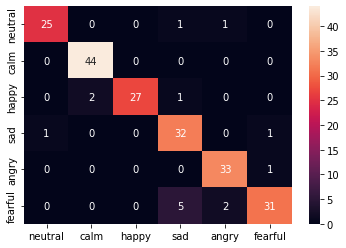

In [11]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [12]:
path='/content/drive/My Drive/fusion/fusion_model/logistic_regression/expert2'
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
